In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import time
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read file

In [2]:
df = pd.read_csv("diagnosis-of-covid-19-and-its-clinical-spectrum.csv")
df

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Encoding

In [3]:
def resultFunction(x):
    if x == "negative":
        return 0
    elif x == "positive":
        return 1
    
df["sars_cov_2_exam_result"] = df["sars_cov_2_exam_result"].apply(resultFunction)
df

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,f,f,f,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,1,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
df = df.select_dtypes(exclude=['object'])
df = df.drop(["patient_age_quantile"], axis = 1)
df

,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def cleanse():
    for i in np.arange(0.8, 1, 0.01):
        df_copy = df
        df_copy = df_copy.loc[:, df.isnull().sum() < i*df.shape[0]]
        df_copy = df_copy.dropna()
        print("Threshold: ", i, "Shape: ", df_copy.shape)

cleanse()

Threshold:  0.8 Shape:  (5644, 1)
Threshold:  0.81 Shape:  (5644, 1)
Threshold:  0.8200000000000001 Shape:  (5644, 1)
Threshold:  0.8300000000000001 Shape:  (5644, 1)
Threshold:  0.8400000000000001 Shape:  (5644, 1)
Threshold:  0.8500000000000001 Shape:  (5644, 1)
Threshold:  0.8600000000000001 Shape:  (5644, 1)
Threshold:  0.8700000000000001 Shape:  (5644, 1)
Threshold:  0.8800000000000001 Shape:  (5644, 1)
Threshold:  0.8900000000000001 Shape:  (5644, 1)
Threshold:  0.9000000000000001 Shape:  (598, 15)
Threshold:  0.9100000000000001 Shape:  (510, 16)
Threshold:  0.9200000000000002 Shape:  (420, 17)
Threshold:  0.9300000000000002 Shape:  (272, 19)
Threshold:  0.9400000000000002 Shape:  (242, 21)
Threshold:  0.9500000000000002 Shape:  (242, 21)
Threshold:  0.9600000000000002 Shape:  (122, 22)
Threshold:  0.9700000000000002 Shape:  (50, 27)
Threshold:  0.9800000000000002 Shape:  (18, 37)
Threshold:  0.9900000000000002 Shape:  (0, 47)


In [6]:
df = df.loc[:, df.isnull().sum() < 0.9199999999999996*df.shape[0]]
df = df.dropna()
df

,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,neutrophils,proteina_c_reativa_mg_dl
1,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
18,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
28,0,1.014726,0.854844,-0.178244,0.796029,0.489872,-0.730707,-0.353319,-0.075131,2.525365,0.544077,0.217977,0.767079,0.068652,0.171035,0.651115,-0.434025
29,0,0.740064,0.854844,0.361914,-0.550290,0.436981,-0.227493,0.642463,0.105751,-0.529226,0.596348,-0.371974,0.386517,0.121178,-0.713529,0.347905,-0.529401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,0,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,1.118221,3.627427
5614,0,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,1.134611,5.733660
5615,0,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,-0.061837,0.561468
5618,0,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,1.552548,0.609157


# PCA

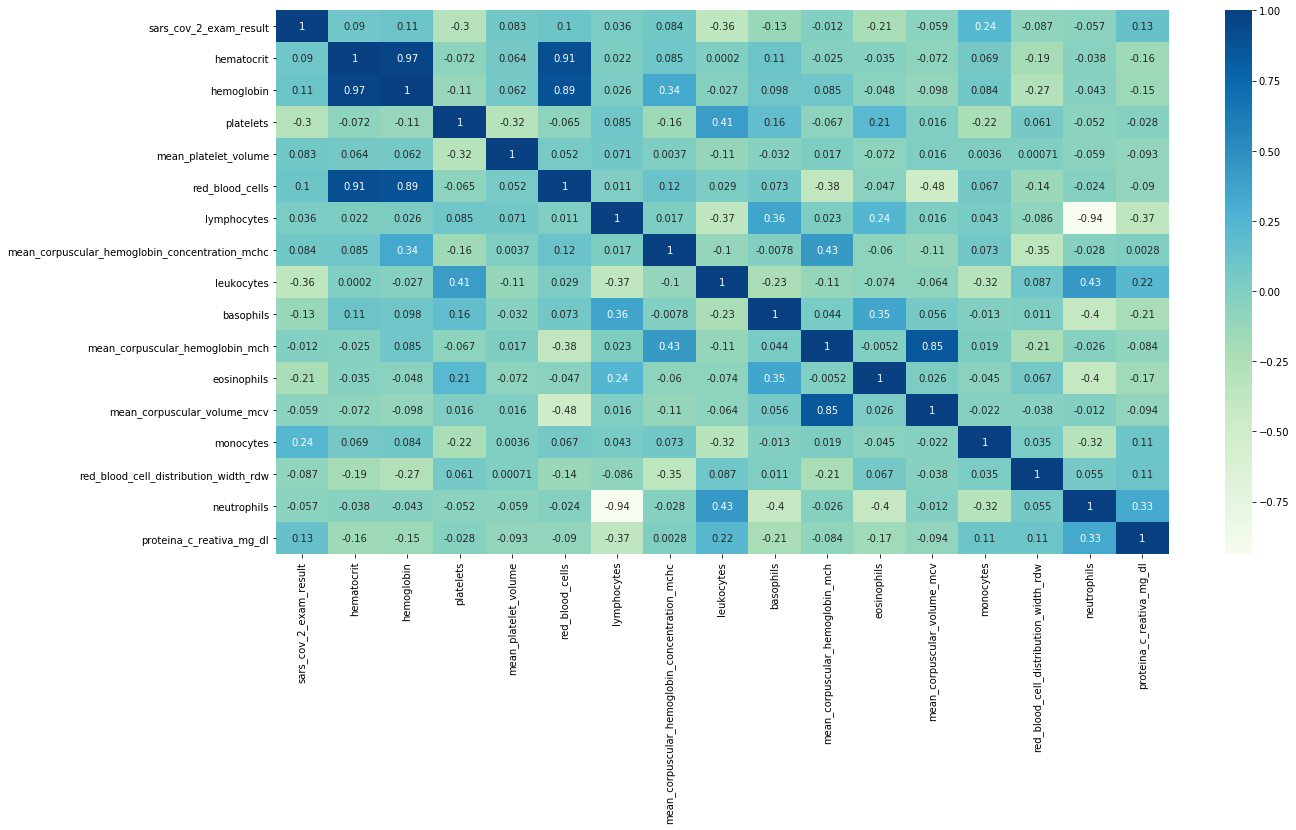

In [7]:
corr_mat = df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(data=corr_mat, annot=True, cmap="GnBu")
plt.show()

In [8]:
candidates = corr_mat.index.values

In [9]:
removed = []

for c1 in candidates:
    for c2 in candidates:
        if (c1 not in removed) and (c2 not in removed):
            if c1!=c2:
                if corr_mat.loc[c1,c2] > 0.6 or corr_mat.loc[c1,c2] < -0.6:
                    removed.append(c1)
print("Removed: ", removed)

Removed:  ['hematocrit', 'hemoglobin', 'lymphocytes', 'mean_corpuscular_hemoglobin_mch']


In [10]:
data = df.drop(removed, axis=1)
data.head()

,sars_cov_2_exam_result,platelets,mean_platelet_volume,red_blood_cells,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,neutrophils,proteina_c_reativa_mg_dl
1,0,-0.517413,0.010677,0.102004,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,0,1.429667,-1.672222,-0.850035,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
18,0,0.072992,-0.550290,0.542763,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
28,0,-0.178244,0.796029,0.489872,-0.353319,-0.075131,2.525365,0.217977,0.767079,0.068652,0.171035,0.651115,-0.434025
29,0,0.361914,-0.550290,0.436981,0.642463,0.105751,-0.529226,-0.371974,0.386517,0.121178,-0.713529,0.347905,-0.529401


In [11]:
from mpl_toolkits import mplot3d

In [12]:
y = data.iloc[:, 0].values.astype("int")
x = data.iloc[:, 1:]

In [13]:
for i in range(1,10):
    pca = PCA(n_components=i)
    pc = pca.fit_transform(x)
    print("Explained Variance ratio sum of n_components " +str(i)+ ": ", pca.explained_variance_ratio_.sum())

Explained Variance ratio sum of n_components 1:  0.18751147800626675
Explained Variance ratio sum of n_components 2:  0.35104829850309605
Explained Variance ratio sum of n_components 3:  0.4786548921938646
Explained Variance ratio sum of n_components 4:  0.5854758985065059
Explained Variance ratio sum of n_components 5:  0.6817604539847858
Explained Variance ratio sum of n_components 6:  0.7513305700942221
Explained Variance ratio sum of n_components 7:  0.8101871191793104
Explained Variance ratio sum of n_components 8:  0.8626675153151293
Explained Variance ratio sum of n_components 9:  0.9067313771858302


In [14]:
#n_components = 8 is the optimal value
pca = PCA(n_components=8)
pc = pca.fit_transform(x)

In [15]:
columns = ["Class"]
for i in range(1,9):
    columns.append("PC"+str(i))
    
a = np.append(np.reshape(y, (-1,1)), pc, axis=1)

PCA_data = pd.DataFrame(a, columns = columns)
PCA_data.head()

,Class,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.0,1.108064,0.230495,0.239158,0.307115,-0.134055,0.194245,-0.282053,-1.493653
1,0.0,0.492941,0.210027,-2.438205,-2.666281,1.139606,1.626717,0.655840,1.033698
2,0.0,-0.812625,0.224659,0.083754,0.104292,0.222804,-0.910387,-0.397893,-0.020054
3,0.0,0.593251,0.166147,0.259957,0.380827,-0.976943,-0.357808,-0.216468,0.476698
4,0.0,-0.547842,-0.172084,-0.649295,-0.891485,0.253947,-0.498507,0.139637,-0.115486


In [16]:
x_pca = PCA_data.iloc[:, 1:9].values
x_pca

array([[ 1.10806364,  0.23049491,  0.23915767, ...,  0.19424473,
        -0.28205322, -1.49365302],
       [ 0.49294129,  0.21002708, -2.43820514, ...,  1.62671712,
         0.65584019,  1.03369774],
       [-0.81262531,  0.22465855,  0.08375385, ..., -0.91038664,
        -0.39789269, -0.02005382],
       ...,
       [-0.36739633, -1.8306136 , -0.57118639, ...,  0.11978216,
         0.3579306 , -0.14250618],
       [-1.34024526, -1.10805412,  3.21659004, ...,  1.49331445,
        -0.75102395, -0.05686879],
       [-0.70821488, -1.20038755,  0.46966901, ..., -0.74096467,
        -0.890821  , -0.37805961]])

In [17]:
x_nopca = df.iloc[:, 1:].values
x_nopca

array([[ 0.23651545, -0.02234027, -0.51741302, ..., -0.62507266,
        -0.61908603, -0.14789495],
       [-1.57168222, -0.774212  ,  1.42966747, ..., -0.97889912,
        -0.12739536, -0.28698576],
       [ 0.99183822,  0.79218763,  0.07299204, ...,  0.1710353 ,
         0.26595679, -0.48767394],
       ...,
       [ 0.71717513,  1.10546756, -0.49228939, ..., -1.15581191,
        -0.06183668,  0.5614683 ],
       [-3.24254799, -2.77920342, -1.7735939 , ..., -0.44815987,
         1.55254781,  0.60915661],
       [ 0.69428688,  0.54156393, -0.90682912, ..., -0.18279028,
         0.38068476, -0.50357002]])

# k-Means with PCA

# Duration of training model

In [18]:
#training time with 2 clusters
kmeans_model2 = KMeans(n_clusters =2)
start_time = time.time()
kmeans_model2.fit(x_pca)
end_time = time.time()
print((end_time - start_time))

0.08674860000610352


In [19]:
#training time with 3 clusters
kmeans_model3 = KMeans(n_clusters =3)
start_time = time.time()
kmeans_model3.fit(x_pca)
end_time = time.time()
print((end_time - start_time))

0.08911800384521484


In [20]:
#training time with 4 clusters
kmeans_model4 = KMeans(n_clusters =4)
start_time = time.time()
kmeans_model4.fit(x_pca)
end_time = time.time()
print((end_time - start_time))

0.09003233909606934


In [21]:
#Find the optimum number of clusters for k-means
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

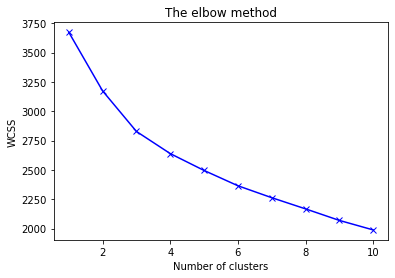

In [22]:
#Plot and observe the elbow
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [23]:
#using 2 clusters
kmeans_pca2 = KMeans(n_clusters = 2)
clusters_pca2 = kmeans_pca2.fit_predict(x_pca)
#clusters_pca

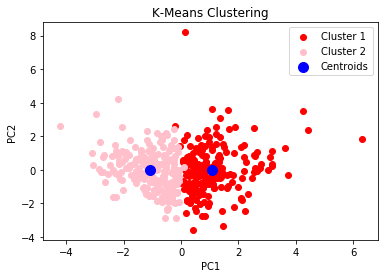

In [24]:
#2D plot
colors = ['red', 'pink', 'green', 'yellow']
for i in np.unique(clusters_pca2):
    plt.scatter(x_pca[clusters_pca2==i,0], x_pca[clusters_pca2==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))


plt.scatter(kmeans_pca2.cluster_centers_[:, 0], kmeans_pca2.cluster_centers_[:,1],
            s=100, c='blue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(PCA_data.columns[1])
plt.ylabel(PCA_data.columns[2])
plt.show()

In [25]:
#using 3 clusters
kmeans_pca3 = KMeans(n_clusters = 3)
clusters_pca3 = kmeans_pca3.fit_predict(x_pca)
#clusters_pca

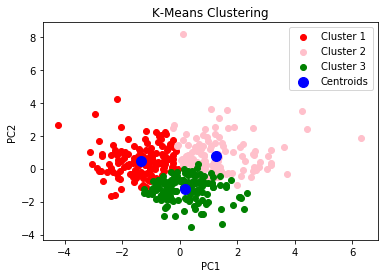

In [26]:
#2D plot
colors = ['red', 'pink', 'green', 'yellow']
for i in np.unique(clusters_pca3):
    plt.scatter(x_pca[clusters_pca3==i,0], x_pca[clusters_pca3==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))


plt.scatter(kmeans_pca3.cluster_centers_[:, 0], kmeans_pca3.cluster_centers_[:,1],
            s=100, c='blue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(PCA_data.columns[1])
plt.ylabel(PCA_data.columns[2])
plt.show()

In [27]:
#using 4 clusters
kmeans_pca4 = KMeans(n_clusters = 4)
clusters_pca4 = kmeans_pca4.fit_predict(x_pca)
#clusters_pca

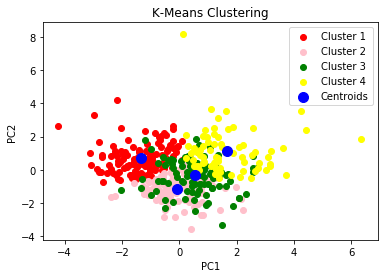

In [28]:
#2D plot
colors = ['red', 'pink', 'green', 'yellow']
for i in np.unique(clusters_pca4):
    plt.scatter(x_pca[clusters_pca4==i,0], x_pca[clusters_pca4==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))


plt.scatter(kmeans_pca4.cluster_centers_[:, 0], kmeans_pca4.cluster_centers_[:,1],
            s=100, c='blue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(PCA_data.columns[1])
plt.ylabel(PCA_data.columns[2])
plt.show()

# k-Means without PCA

# Duration of training Model

In [29]:
#trainging time with 2 clusters
kmeans_model_nopca2 = KMeans(n_clusters =2)
start_time = time.time()
kmeans_model_nopca2.fit(x_nopca)
end_time = time.time()
print((end_time - start_time))

0.09406876564025879


In [30]:
#training time with 3 clusters
kmeans_model_nopca3 = KMeans(n_clusters =3)
start_time = time.time()
kmeans_model_nopca3.fit(x_nopca)
end_time = time.time()
print((end_time - start_time))

0.08755111694335938


In [31]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x_nopca)
    wcss.append(kmeans.inertia_)

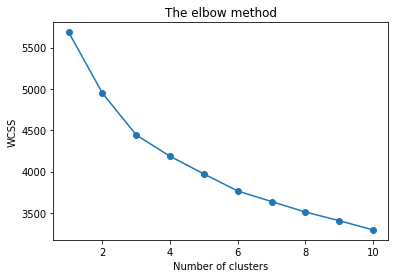

In [32]:
plt.plot(range(1, 11), wcss, '-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [33]:
#using 2 clusters
kmeans_nopca2 = KMeans(n_clusters = 2)
clusters_nopca2 = kmeans_nopca2.fit_predict(x_nopca)
#clusters_nopca

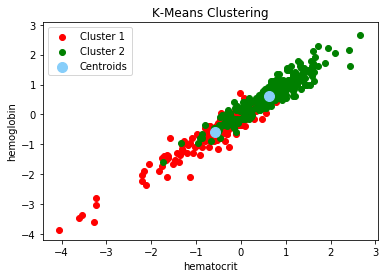

In [34]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters_nopca2):
    plt.scatter(x_nopca[clusters_nopca2==i,0], x_nopca[clusters_nopca2==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))


plt.scatter(kmeans_nopca2.cluster_centers_[:, 0], kmeans_nopca2.cluster_centers_[:,1],
            s=100, c='lightskyblue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()

In [35]:
#using 3 clusters
kmeans_nopca3 = KMeans(n_clusters = 3)
clusters_nopca3 = kmeans_nopca3.fit_predict(x_nopca)
#clusters_nopca

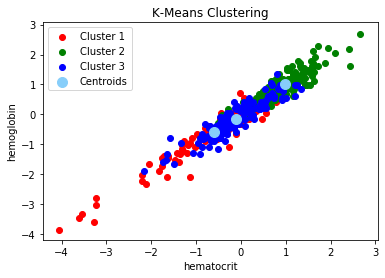

In [36]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters_nopca3):
    plt.scatter(x_nopca[clusters_nopca3==i,0], x_nopca[clusters_nopca3==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))


plt.scatter(kmeans_nopca3.cluster_centers_[:, 0], kmeans_nopca3.cluster_centers_[:,1],
            s=100, c='lightskyblue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()

# Hierarchical Clustering With PCA

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

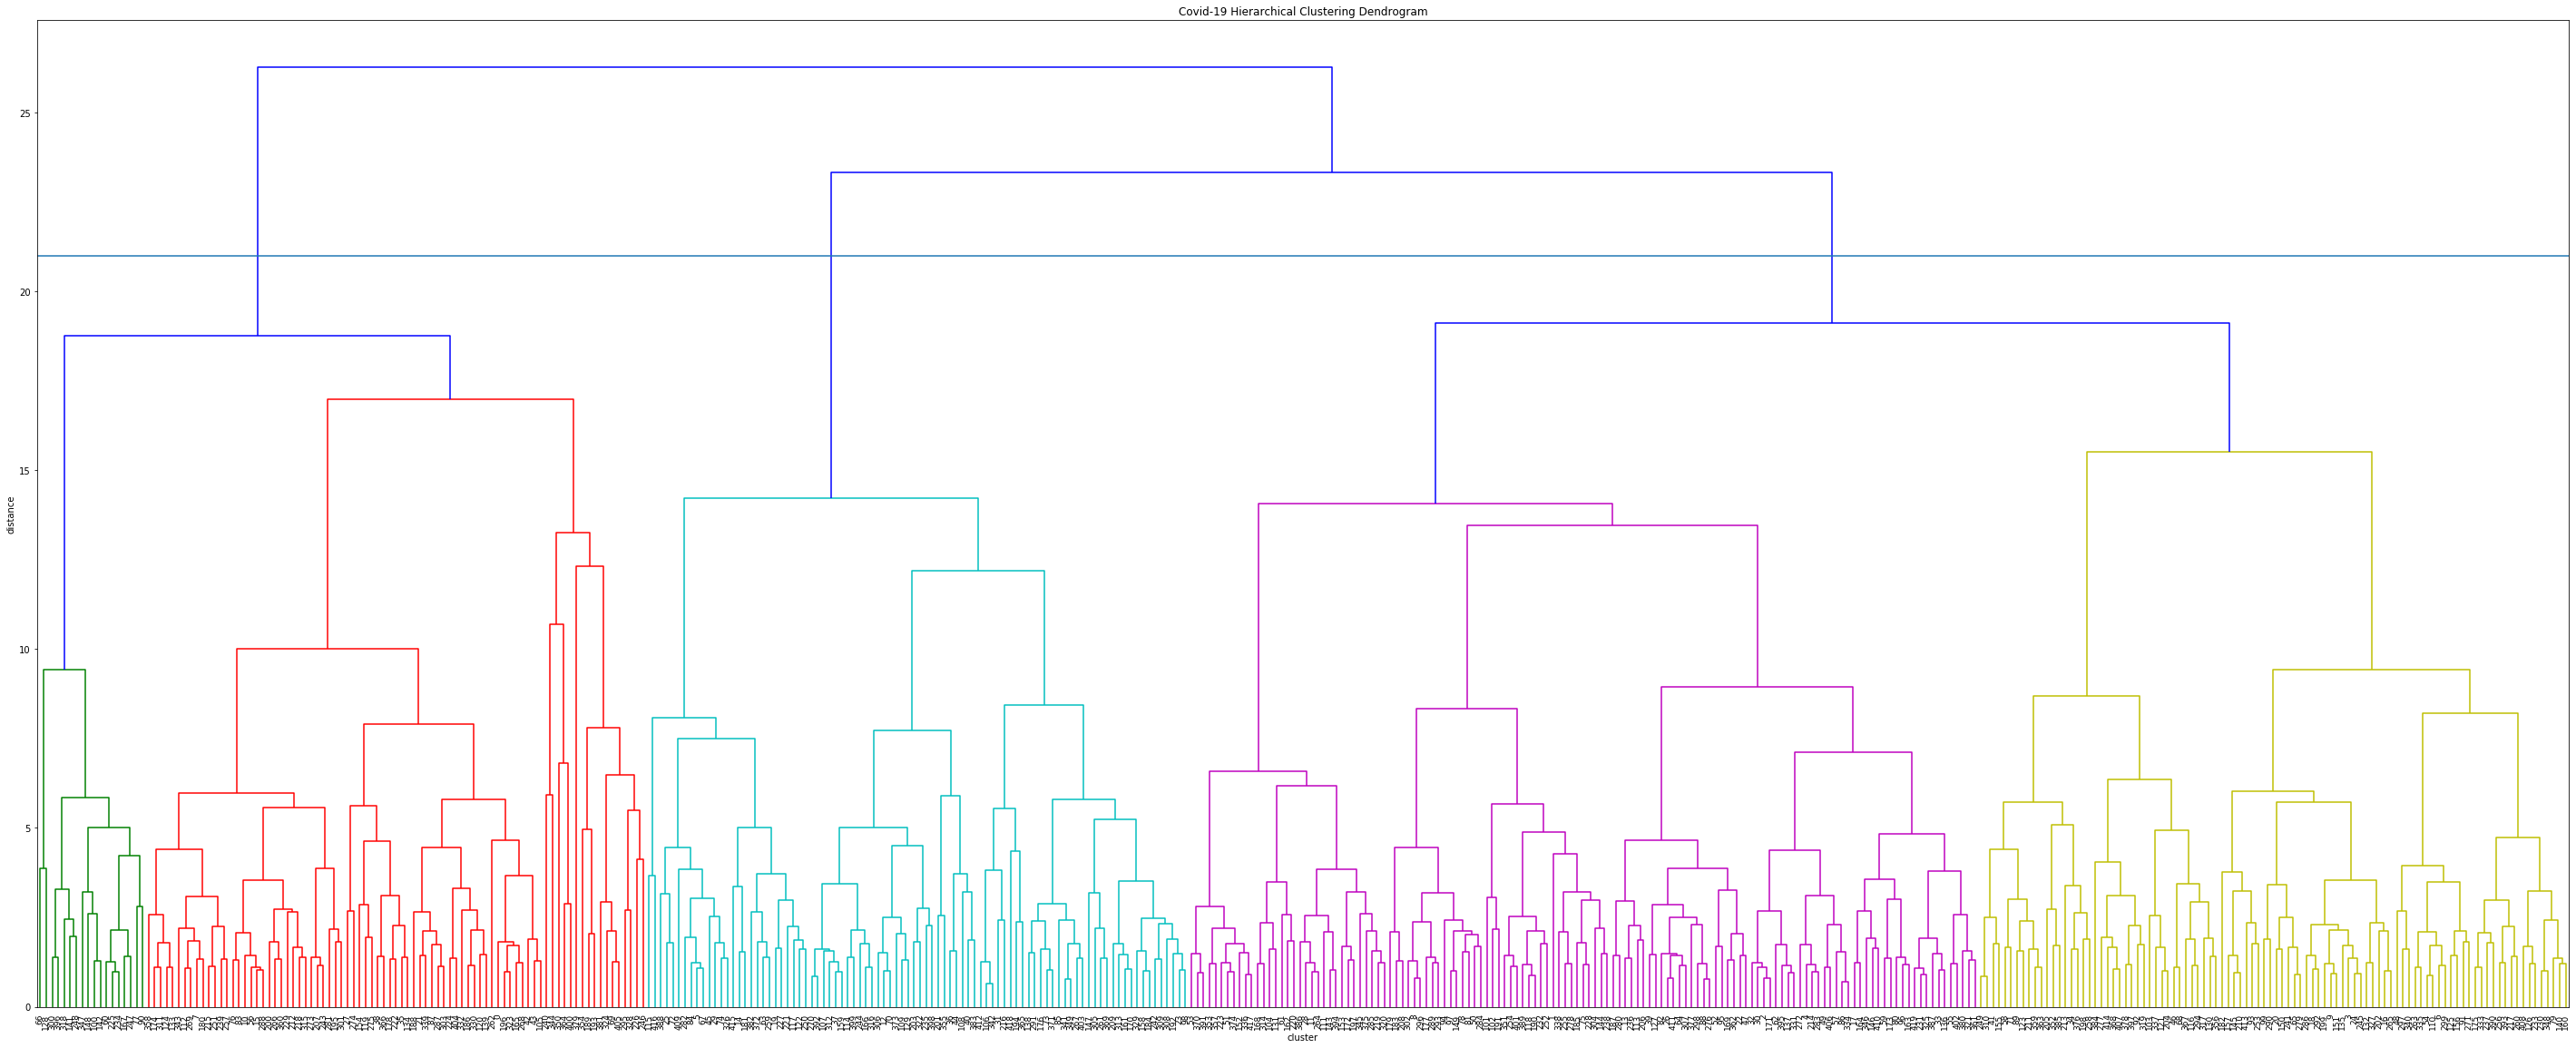

In [38]:
plt.figure(figsize=(50, 20))
plt.title('Covid-19 Hierarchical Clustering Dendrogram')
plt.xlabel('cluster')
plt.ylabel('distance')

dendrogram(
    linkage(x_pca, "ward"),
    leaf_font_size=9
)
plt.axhline(y=21)
plt.show()

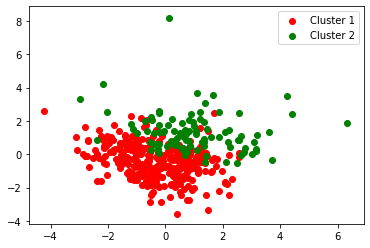

In [39]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=2)
clustering.fit(x_pca)

colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(x_pca[clustering.labels_ == i, 0], x_pca[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))
plt.legend()
plt.show()

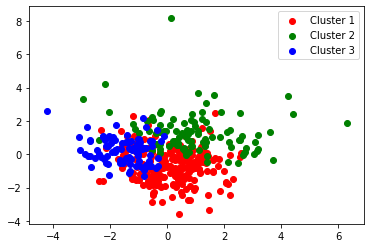

In [40]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(x_pca)

colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(x_pca[clustering.labels_ == i, 0], x_pca[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))
plt.legend()
plt.show()

In [41]:
import time
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
start_time = time.time()
clustering.fit(x_pca)
end_time = time.time()
print((end_time - start_time))

0.012026548385620117


# Hierarchical Clustering Without PCA

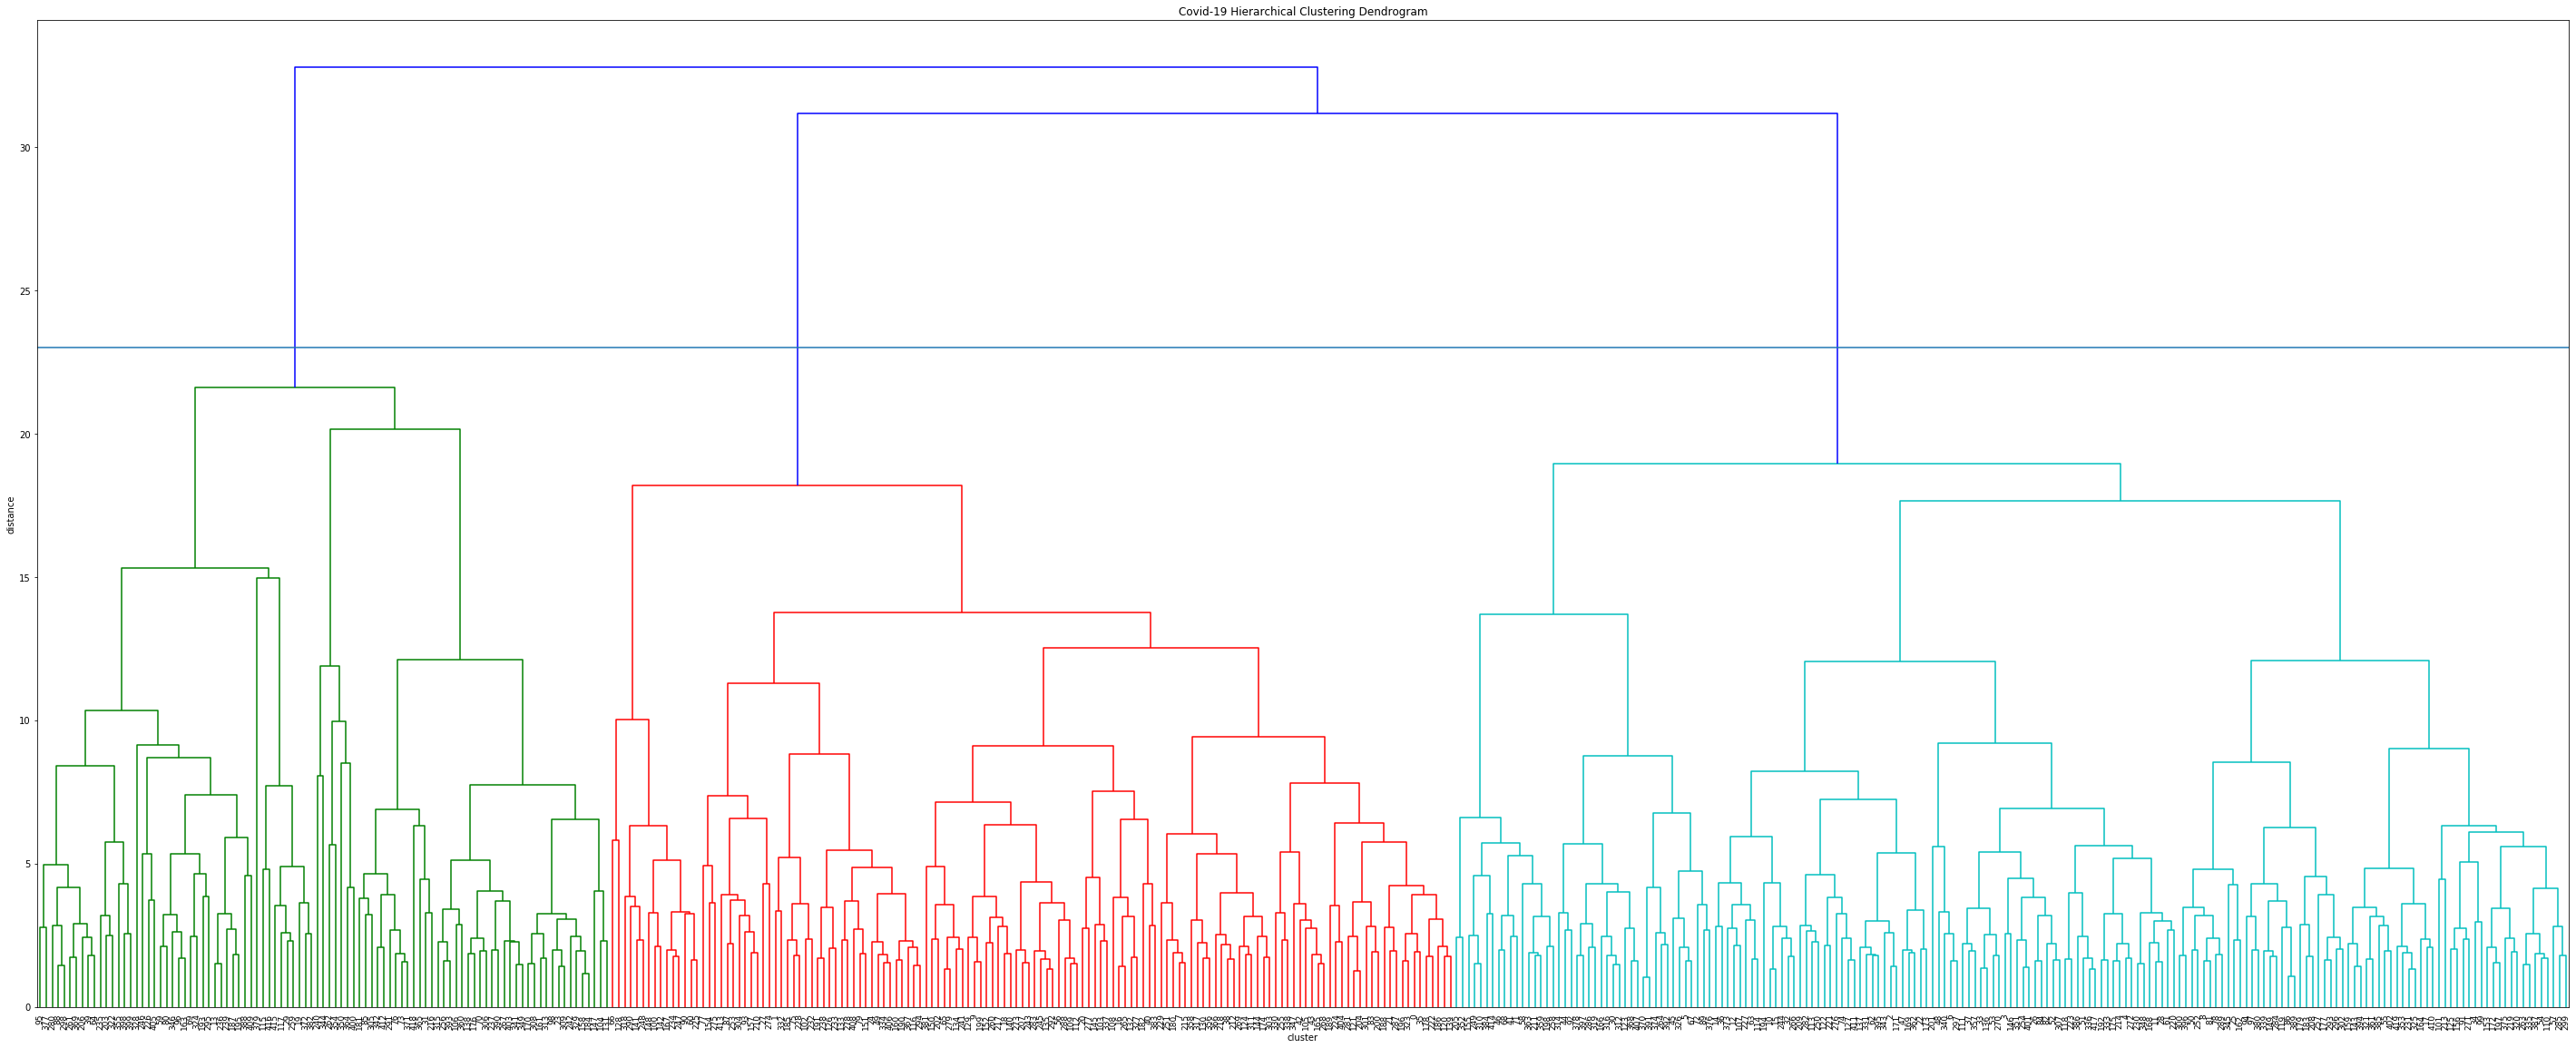

In [62]:
plt.figure(figsize=(50, 20))
plt.title('Covid-19 Hierarchical Clustering Dendrogram')
plt.xlabel('cluster')
plt.ylabel('distance')

dendrogram(
    linkage(x_nopca, "ward"),
    leaf_font_size=9
)
plt.axhline(y=23)
plt.show()

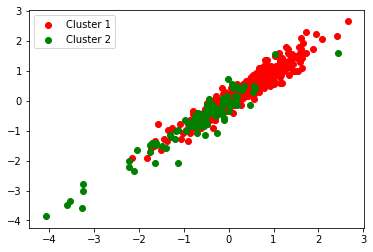

In [43]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=2)
clustering.fit(x_nopca)

colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(x_nopca[clustering.labels_ == i, 0], x_nopca[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))
plt.legend()
plt.show()

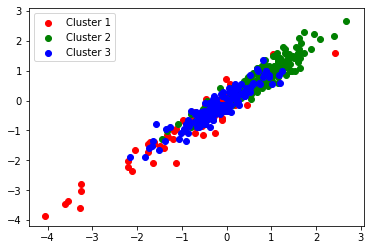

In [44]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(x_nopca)

colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(x_nopca[clustering.labels_ == i, 0], x_nopca[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))
plt.legend()
plt.show()

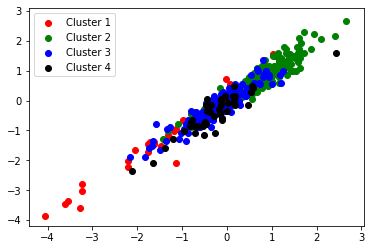

In [45]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=4)
clustering.fit(x_nopca)

colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(x_nopca[clustering.labels_ == i, 0], x_nopca[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))
plt.legend()
plt.show()

In [46]:
import time
clustering = AgglomerativeClustering(linkage="ward", n_clusters=4)
start_time = time.time()
clustering.fit(x_nopca)
end_time = time.time()
print((end_time - start_time))

0.014067649841308594


# DBSCAN

# Finding Optimal Eps

In [47]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [48]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_nopca)
distances, indices = nbrs.kneighbors(x_nopca)

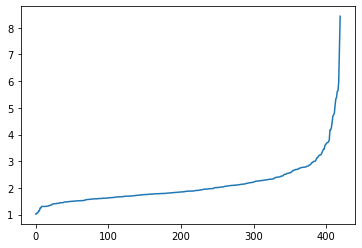

In [49]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature.

So, we train our model by setting 3 for eps and 2 for min_samples.

# DBSCAN without PCA

In [50]:
dbscan = DBSCAN(eps=3, min_samples = 2) #eps (radius), and min_samples (minimum number of points to form a core point)

start = time.process_time()
clusters = dbscan.fit_predict(x_nopca)
end = time.process_time()

train_duration = end - start
print("Train Duration: ",train_duration)

Train Duration:  0.03125


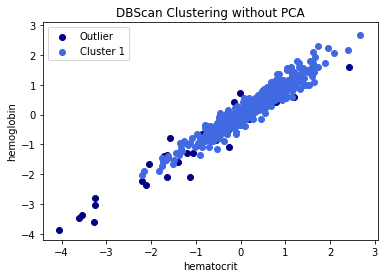

In [51]:
colors = ['royalblue', 'orange', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']

outiler_count=0
cluster_count=0
for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    plt.scatter(x_nopca[clusters==i,0], x_nopca[clusters==i,1],
                color=colors[i], label=label)

plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.title("DBScan Clustering without PCA")
plt.legend()
plt.show()

In [52]:
cluster_count = len(set(clusters)) - (1 if -1 in clusters else 0)
outiler_count = list(clusters).count(-1)
    
print("No: of Outliers:",outiler_count)
print("No: of Clusters:",cluster_count)

No: of Outliers: 35
No: of Clusters: 1


# eps=3 and min_sampl=3

Train Duration:  0.015625


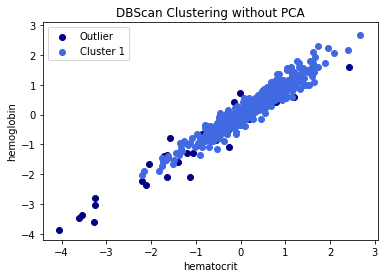

In [53]:
dbscan = DBSCAN(eps=3, min_samples = 2) #eps (radius), and min_samples (minimum number of points to form a core point)

start = time.process_time()
clusters = dbscan.fit_predict(x_nopca)
end = time.process_time()

train_duration = end - start
print("Train Duration: ",train_duration)

colors = ['royalblue', 'orange', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']

outiler_count=0
cluster_count=0
for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    plt.scatter(x_nopca[clusters==i,0], x_nopca[clusters==i,1],
                color=colors[i], label=label)

plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.title("DBScan Clustering without PCA")
plt.legend()
plt.show()

In [54]:
cluster_count = len(set(clusters)) - (1 if -1 in clusters else 0)
outiler_count = list(clusters).count(-1)
    
print("No: of Outliers:",outiler_count)
print("No: of Clusters:",cluster_count)

No: of Outliers: 35
No: of Clusters: 1


# DBSCAN with PCA

In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples = 3) #eps (radius), and min_samples (minimum number of points to form a core point)

start = time.process_time()
clusters = dbscan.fit_predict(x_pca)
end = time.process_time()

train_duration = end - start

print("Train Duration: ",train_duration)

Train Duration:  0.0


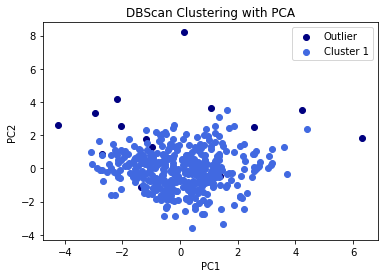

In [56]:
colors = ['royalblue', 'yellow', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    plt.scatter(x_pca[clusters==i,0], x_pca[clusters==i,1],
                color=colors[i], label=label)
plt.xlabel(PCA_data.columns[1])
plt.ylabel(PCA_data.columns[2])
plt.title("DBScan Clustering with PCA")
plt.legend()
plt.show()

In [57]:
cluster_count = len(set(clusters)) - (1 if -1 in clusters else 0)
outiler_count = list(clusters).count(-1)
    
print("No: of Outliers:",outiler_count)
print("No: of Clusters:",cluster_count)

No: of Outliers: 14
No: of Clusters: 1


# Eps=3 and min_sample=2

In [58]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples = 2)  #eps (radius), and min_samples (minimum number of points to form a core point)

start = time.process_time()
clusters = dbscan.fit_predict(x_pca)
end = time.process_time()
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [59]:
train_duration = end - start

print("Train Duration: ",train_duration)

Train Duration:  0.015625


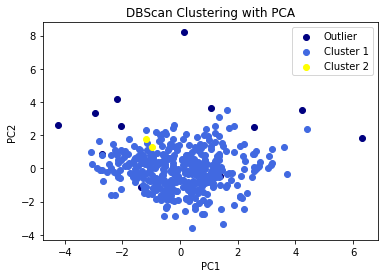

In [60]:

colors = ['royalblue', 'yellow', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    plt.scatter(x_pca[clusters==i,0], x_pca[clusters==i,1],
                color=colors[i], label=label)
plt.xlabel(PCA_data.columns[1])
plt.ylabel(PCA_data.columns[2])
plt.title("DBScan Clustering with PCA")
plt.legend()
plt.show()


In [61]:
cluster_count = len(set(clusters)) - (1 if -1 in clusters else 0)
outiler_count = list(clusters).count(-1)
    
print("No: of Outliers:",outiler_count)
print("No: of Clusters:",cluster_count)

No: of Outliers: 12
No: of Clusters: 2
